# Chapter 2 : End to end Machine Learning Project - California Housing price prediction for real estate investment
---

## 1. _GET THE DATA_
---

> ## 1.1 Download the Data

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("dataset", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data (housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join (housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open (tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd
def load_housing_data (housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing_df = load_housing_data()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> ## 1.2 Data exploration

### 1.2.1 Main information

In [4]:
print(housing_df.info())
print(housing_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB
None
(20640, 10)


**Note** : we can see that ***total_bedrooms*** has some missing values. We will have to deal with it in a later step since ML algorithms don't do well with it. 

### 1.2.2 Number of NaN per feature and unique value count

In [5]:
# the below list gives for each feature of the dataset ("feature name", Count of NaN, equivalent percentage of NaN, Number of unique value)
[(x, housing_df[x].isna().sum(), str((housing_df[x].isna().sum()/housing_df.shape[0]*100).round(1))+str(" %"), len((housing_df[x].unique()))) for x in housing_df.columns.values.tolist()]

[('longitude', 0, '0.0 %', 844),
 ('latitude', 0, '0.0 %', 862),
 ('housing_median_age', 0, '0.0 %', 52),
 ('total_rooms', 0, '0.0 %', 5926),
 ('total_bedrooms', 207, '1.0 %', 1924),
 ('population', 0, '0.0 %', 3888),
 ('households', 0, '0.0 %', 1815),
 ('median_income', 0, '0.0 %', 12928),
 ('median_house_value', 0, '0.0 %', 3842),
 ('ocean_proximity', 0, '0.0 %', 5)]

### 1.2.3 Describe the dataset and distribution of numerical attributes

> 1.2.3.1 **Describe**

In [6]:
housing_df.describe(include="all").round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82,NaN
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62,NaN
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,NaN
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00,NaN
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00,NaN
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00,NaN


Some of the features are text input or categorical features, let'S take a look at them more closely by looking at the value of their uniques values

In [7]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

> 1.2.3.2 **Distribution numerical attributes**

Let's aslo plot an histogram of each numerical attributes of the dataset to have an idea of the distribution per numerical attributes

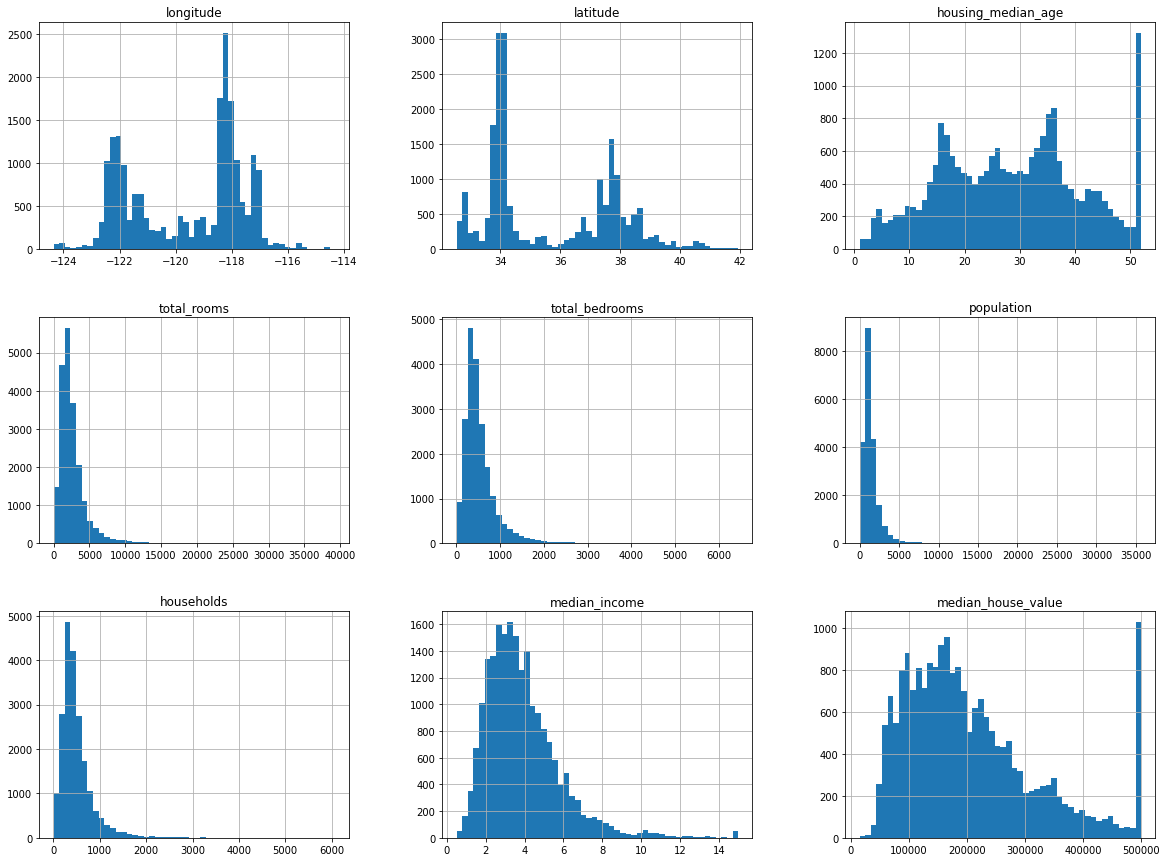

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize = (20,15))
plt.show()

#### First comments

1. MEDIAN INCOME : Already pre-processed data.  First the mediam income is not expressed in USD but in kUSD. Plus the data has been capped to 15.0001 for max, 0.5 for min.
2. HOUSING MEDIAN AGE : Already pre-processed data. Capped max to 52.
3. MEDIAN HOUSE VALUE : Already preprocessed data. Has been capped at 500,000 USD. This can be a problem Since this is our target attribute (the labels for the supervised multi-variable regression). In this type of case, need to check with the client team to see if this is a problem or not : for example if we ant to have accurate pricing prediction on values beyond 500,000USD. In that case we have two options :
- Collect proper labels for those which were capped
- Remove those districts from the training set (and also from the test set) since our system should not be evaluated poorly if predicts values beyonfd 500,000USD 
4. Most of the attributes have very different scales . We will have to do Scaling to not create attributes that will have a too strong influence in the regression
5. Many of the histograms are *tail heavy* : They extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will have to do some transforming to have more bell-shapped distributions.


In [9]:
import matplotlib.pyplot as plt 

def globalview(df_g, ps, plot_space,ls,transpa):
#ps stands for plotsize
#ls stand for label font size

#let's name our local variables
    ax=[] # create a empty list to storage all the axes of the scripting layer
    features_l=df_g.columns.values.tolist() # storage the columns name of the input dataframe
    n=len(features_l) # Assess the number of features to be shown
    
# create a figure 
    fig=plt.figure() 
    fig.tight_layout(pad=plot_space)

#Let's create a sublot structure that can hadle the multianalysis of our features 
    for i in range(1,n**2+1):
        ax.append(fig.add_subplot(n,n,i))

    t=0 # initialize a counter to go through the as list
    for i in features_l:
        for j in features_l:
            if i==j:
                df_g[[i]].plot(kind='hist', figsize=(ps,ps), ax=ax[t])
                ax[t].set_xlabel(str(i), fontsize=ls)
                ax[t].set_ylabel(str(j), fontsize=ls) # plot an histogram on the diagonal of the figure
            else:
                df_g[features_l].plot(kind='scatter', x=str(i), y=str(j), figsize=(ps,ps), ax=ax[t], alpha=transpa)
                ax[t].set_xlabel(str(i), fontsize=ls)
                ax[t].set_ylabel(str(j), fontsize=ls) # plot a scatter plot between each features
            t=t+1
    return plt.show()

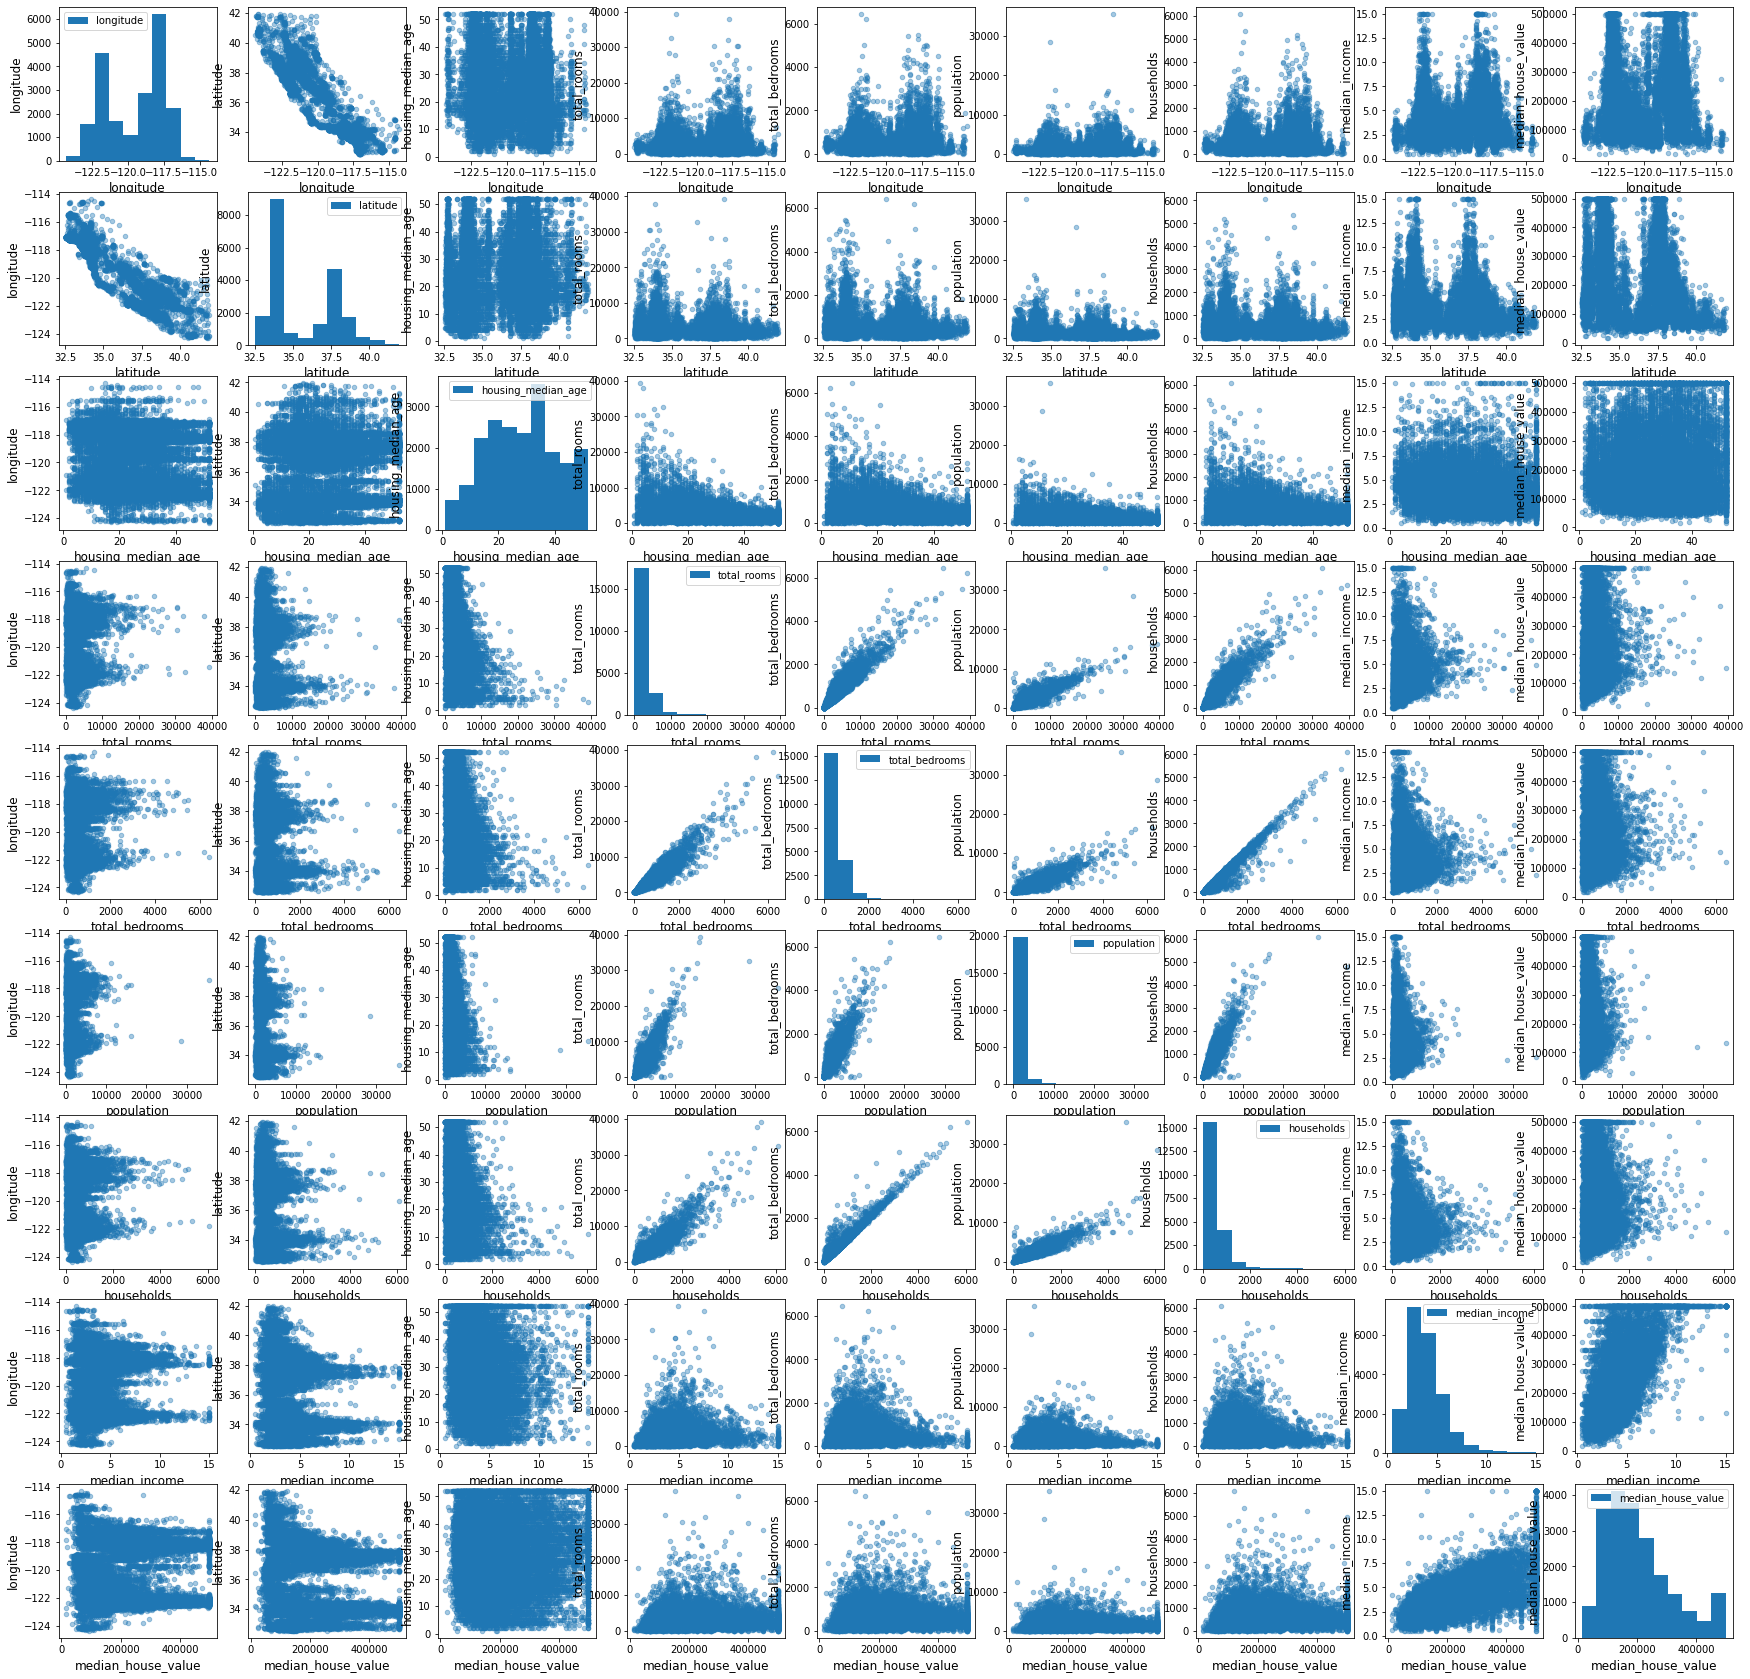

In [10]:
housing_df_drop=housing_df.drop(columns=["ocean_proximity"])
globalview(housing_df_drop,30,10,12,0.4)

## 2. CREATE A TEST SET
---

WHile ususally I will go for data visualisation and serach for correlation, it is actually better to already set aside part of the data at this stage. The problem is that our brain is an amazing pattern detection system, so very likely to do overfitting. If you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particularkind of MAchine Learning Model. WHen you estimate the generalization error using the test set, your estimate will be too opstimistic and you will launch a system that will not perfomas well as expected. This is caled *datas nooping* bias

> ## 2.1 Random sampling methods (not stratified)

>> ### 2.1.1 Using simple numpy random with a seed for repeatability (each time code runs on identical dataset)

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
np.random.seed(42)

train_set , test_set = split_train_test (housing_df, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


This solution for splitting train/test set will break next time we will fetch an UPDATED dataset, to have a stable train/test split. A common solution is to use each instance identifier (via a has function ) (see next) 

>> ### 2.1.2 Using a hash table to be able to have the same test set even if the dataset is updated

For example , we can compute a hash of each instance's identifier and put that instance in the test set if the hash is lower than or equal to 20 % of the maximum hash value. This ensures that the test set will remain consistent accross multiple runs, even if we refresh the dataset. The new test set will contain 20% of the new instances, but will not contain any instance that was previously ion the training set. 

HEre is a possible implementation

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunatly in our case the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID, to do so we will have to add it to the dataset : 

In [14]:
housing_df_with_id = housing_df.reset_index() # this function adds an 'index' column
train_set , test_set = split_train_test_by_id (housing_df_with_id, 0.2, 'index')
print(len(train_set))
print(len(test_set))
test_set.head()

16512
4128


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


Problm of this : if we use the row index as an unique identifier, we need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to built an unique identifier (see below). For example a district latitude and longitude are guaranteed to be stable for a few million years, so we could use them and combine them into an ID like so : 

In [15]:
housing_df_with_id["id"] = housing_df["longitude"] * 1000 + housing_df["latitude"]
train_set , test_set = split_train_test_by_id (housing_df_with_id, 0.2, 'id')
print(len(train_set))
print(len(test_set))
test_set.head()

16322
4318


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


>> ### 2.1.3 Using Scikit-learn

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways.The simplest function is ```train_test_split()```, which does pretty much the same thing as the function ```split_train_test```, with a couple of additional features. First, there is random_state parameter that allows you to set the random generator seed. Second you can pass it multiple datasets with an identical number of rows and it will split them on the same indices (very useful in case of separate DAtaframe for labels) 

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split (housing_df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))
test_set.head()

16512
4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


So far we have considered here purely random, sampling methods. This is generally fine if the data set is large enough ( especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. 
To avoid that we might need to do *stratified sampling*: we divide a pupulation into homogenous subgroups called *strata*, and the right number of instances are sampled from each stratum to guarantee that the test is representative of the overall population. 


Let'S suppose, for the sake of this tuday, that we discussed with the experts and they told us that the median income is a very important attribute to predict median housing prices.


> ## 2.2 Stratum and stratified sampling methods

Let's suppose, for the sake of this tuday, that we discussed with the experts and they told us that the median income is a very important attribute to predict median housing prices.

>> ### 2.2.1 Creating stratum

SInce the mediam income attribute is a numerical continuous attribute we need to create first an income category attribute. Let'S look first at the histogram more closely 

<AxesSubplot:>

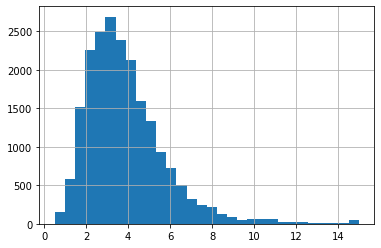

In [17]:
housing_df['median_income'].hist(bins=30)

Most median income value are clustered around 1.5 to 6, but some mediam incomes go far beyond 6 it is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum importance can be biased. This means that you should not have too many strata and each stratum should be large enough. The following code use the ```pd.cut()``` function to create an income category attribute with five categories : 

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


<AxesSubplot:>

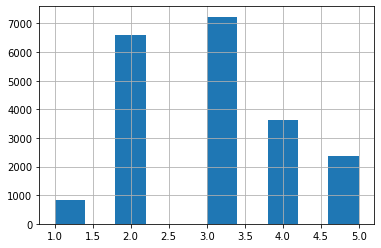

In [18]:
housing_df["income_cat"]=pd.cut(housing_df["median_income"], bins=[0,1.5,3.0,4.5,6.0,np.inf], labels=[1, 2, 3, 4, 5])
print(housing_df["income_cat"].value_counts())
housing_df["income_cat"].hist()

>> ### 2.2.2 Stratified sampling and comparison with other methods

Now we can to stratified sampling based on the income category. WE can use Scikit-Learn's ```StratifiedShuffleSplit``` class:

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# firt we create a stratified shuffle split class object 
split = StratifiedShuffleSplit (n_splits=1, test_size = 0.2, random_state = 42)

# then we apply the split function on the startified shuffle split class object 
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


We can now check if this worked as expected. We will measure the income category proprtions in the full dataset and compared it to the proportion in the test set generated with stratified sampling and in a testset generated using purely random sampling.

In [20]:
train_set, test_set = train_test_split (housing_df, test_size=0.2, random_state=42)

def category_proportion (data,attribute):
    return (data[attribute].value_counts()/len(data)).sort_index()

comparative_table=pd.DataFrame({"Overall":category_proportion (housing_df,"income_cat"),
                                "Random Scikit": category_proportion (test_set,"income_cat"),
                                "Stratified Scikit": category_proportion (strat_test_set,"income_cat")
                               })
comparative_table["Rand. %error"]=((comparative_table["Overall"]-comparative_table["Random Scikit"])/comparative_table["Overall"]*100).round(2)
comparative_table["Strat. %error"]=((comparative_table["Overall"]-comparative_table["Stratified Scikit"])/comparative_table["Overall"]*100).round(2)
comparative_table

,Overall,Random Scikit,Stratified Scikit,Rand. %error,Strat. %error
1,0.039826,0.040213,0.039729,-0.97,0.24
2,0.318847,0.324370,0.318798,-1.73,0.02
3,0.350581,0.358527,0.350533,-2.27,0.01
4,0.176308,0.167393,0.176357,5.06,-0.03
5,0.114438,0.109496,0.114583,4.32,-0.13


The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed. 

Now let's just remove the income_cat attribute so the data is back to its original state. We spend quite a bit of time on test set generation for a good reason : this is often neglected but critical partof ML. These ideas are very useful during the cross-validation step.

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## 3. DATA VISUALISATION AND CORRELATION (WITHOUT/WITH ATTRIBUTES COMBINAISON)
---

Let'S just know work on the training set. When the training set is too large we can also reduce its size to have better performance on visualization.  
Here it is not the case so let's continue with the last train set we generated and make a copy of it to play on it.

In [22]:
df = strat_train_set.copy()

> ## 3.1 Visualizing Geographical data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

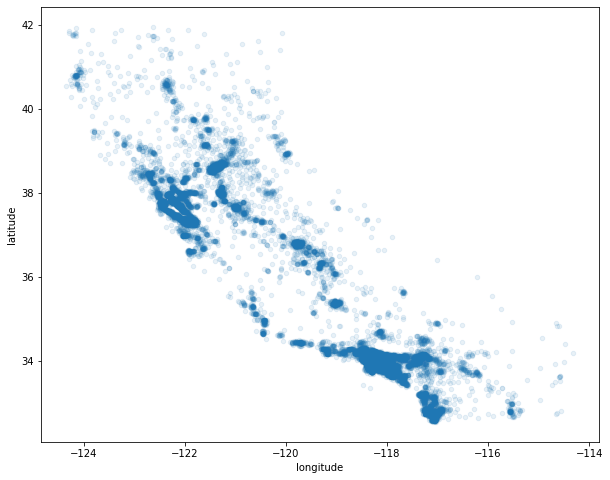

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

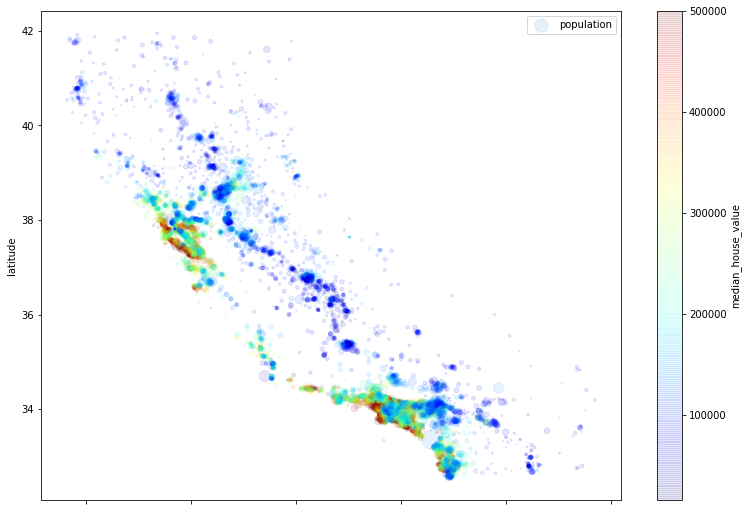

In [24]:
df.plot(kind="scatter",
        x="longitude",
        y="latitude",
        alpha=0.1,
        s=df["population"]/100,
        label="population",
        c="median_house_value",
        cmap=plt.get_cmap("jet"),
        colorbar=True,
        figsize=(13,9))

> ## 3.2 Looking for correlations

>> ### 3.2.1 Using ```pd.corr()```

Since the dataset is not too large we can easily compute he *standard correlation coefficient (also called Pearson's)* between every pairs of attributes with the 
```corr()``` method.
Let's take a view how the features correlate with the "median_house_value" by descending order with and without absolute value and do some comments about it.

In [25]:
df.corr(method='pearson').round(2).sort_values('median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.05,-0.14,0.11,0.14,0.05,-0.03,0.06,0.69,1.00
median_income,-0.02,-0.08,-0.11,0.20,-0.01,0.00,0.01,1.00,0.69
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.33,-0.30,-0.31,-0.11,0.11
households,0.06,-0.08,-0.31,0.92,0.98,0.90,1.00,0.01,0.06
total_bedrooms,0.08,-0.07,-0.33,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.11,-0.12,-0.30,0.86,0.88,1.00,0.90,0.00,-0.03
longitude,1.00,-0.92,-0.11,0.05,0.08,0.11,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.12,-0.08,-0.08,-0.14


In [26]:
df.corr(method='pearson').round(2).abs().sort_values('median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,0.05,0.14,0.11,0.14,0.05,0.03,0.06,0.69,1.00
median_income,0.02,0.08,0.11,0.20,0.01,0.00,0.01,1.00,0.69
latitude,0.92,1.00,0.01,0.04,0.07,0.12,0.08,0.08,0.14
total_rooms,0.05,0.04,0.36,1.00,0.93,0.86,0.92,0.20,0.14
housing_median_age,0.11,0.01,1.00,0.36,0.33,0.30,0.31,0.11,0.11
households,0.06,0.08,0.31,0.92,0.98,0.90,1.00,0.01,0.06
longitude,1.00,0.92,0.11,0.05,0.08,0.11,0.06,0.02,0.05
total_bedrooms,0.08,0.07,0.33,0.93,1.00,0.88,0.98,0.01,0.05
population,0.11,0.12,0.30,0.86,0.88,1.00,0.90,0.00,0.03


We can notice that: 
+ the ***median_income*** attribute has a the strongest Pearson absolute coefficient. The ***median_house_value***  tends to go up when the ***median_income*** goes up.   
+ Then we can notice that there is a very light negative correlation with ***latitude*** meaning that price have a slight tendancy to go down while going north along the State. 
+ ***total_rooms*** and ***housing_median_age*** are also slightly correlated to the ***median_house_value***
+ All the rest are close to 0, there is no linear correaltion Surprinsingly total_bedrooms is not correlated. Let's not forget that this is the total number of bedrooms of the district.  

As a general comment we can also notice that we don't have so much features that really represent properties of the "model" house of the district. (metrics per household for the district for example)

>> ### 3.2.2 Using ```scatter_matrix```

We can use the pandas```scatter_matrix()``` function which will plots every numerical attributes called againstother numerical attributes called.  
Let'S focus on the attributes that's seems to have a chance tpo correlate as for now meaning : ***median_income***, ***latitude***,***total_rooms*** and ***housing_median_age***

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <

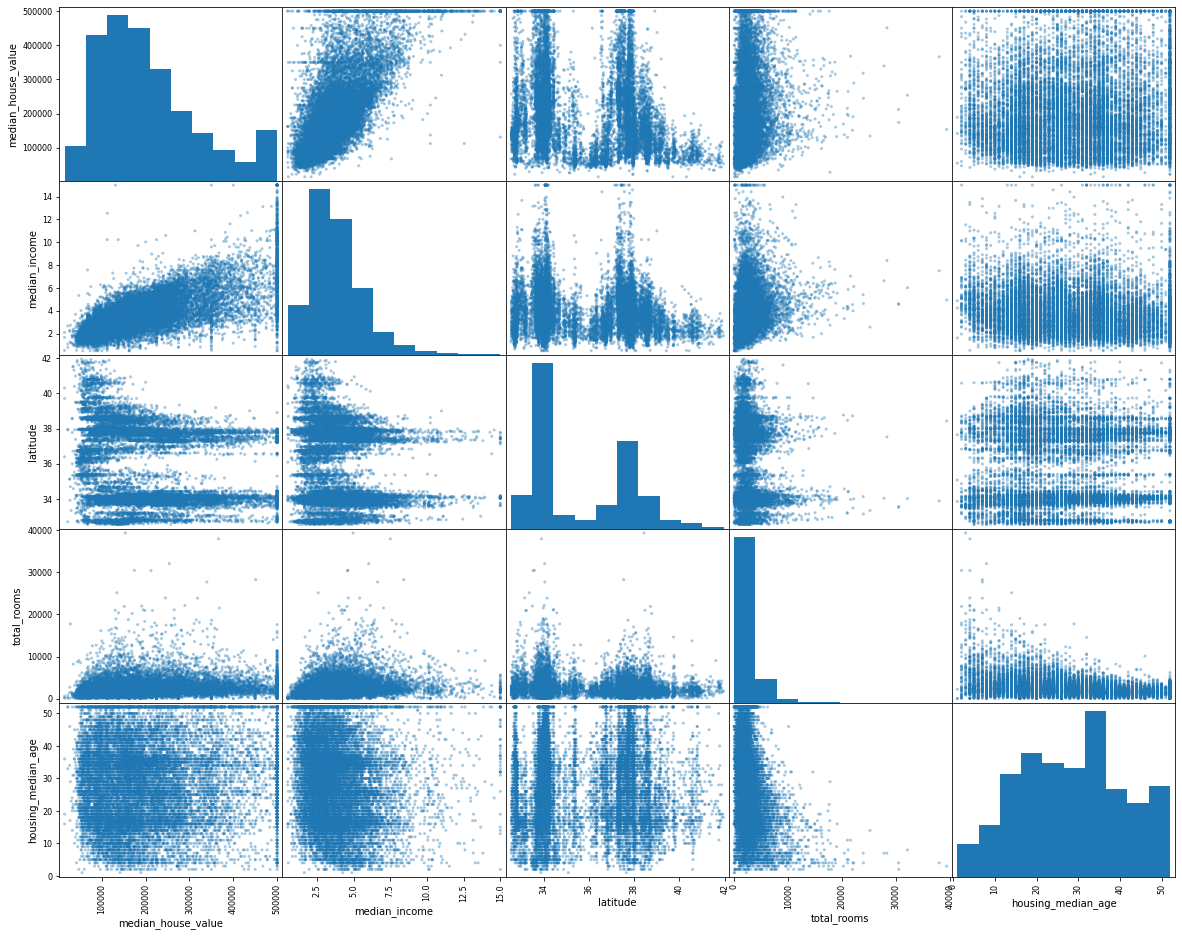

In [27]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","latitude","total_rooms","housing_median_age"]
scatter_matrix(df[attributes], figsize=(20,16),alpha=0.4)

The most promising attribute to predict ***median_house_value*** is the ***median_income*** so let's zoom only on their correaltion scatterplot.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

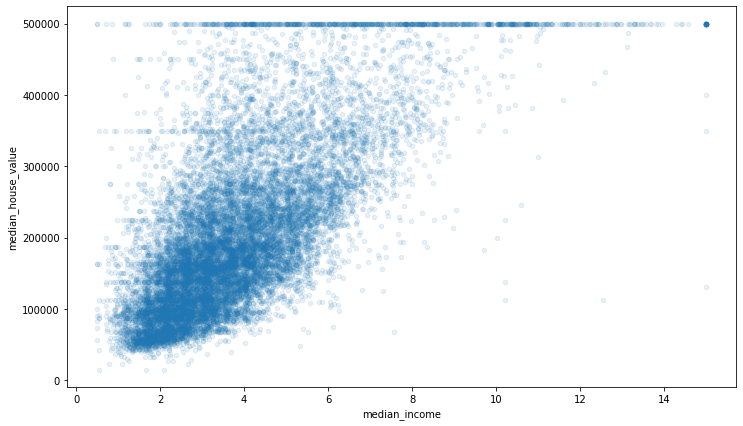

In [28]:
df.plot(kind="scatter",x="median_income", y="median_house_value", figsize=(12,7), alpha=0.1)

Looking at this plot in details reveals a few things:
+ Correaltion is strong, the upward trend is clear, cloud of points is not too dispersed
+ the price cap at 500,000USD appears clearly
+ additional data quirks seems to be present : there are a few straight line around 450,000USD, 350,000USD, 280,000USD, 220,000USD,.. and a few more below

**Note** : It could be interesting to remove those district with data quirks to prevent the lagorithms to reproduce these patterns. That would be something to be checked with the team that generated this dataset.

> ## 3.3 Experimenting with attributes combinaison

As mentionned earlier, we should try some attribute combinaison thet seems to us to be good fit for a correlation with the ***median_house_value*** target. 
For example it seems that it would be interesting to take a look at :
+ the average number of rooms per houselhold in the district:  ***total_rooms*** / ***households***
+ the average number of bedrooms per houselhold in the district:  ***total_bedrooms*** / ***households***
+ the number of bedrooms on the total of rooms of the district:  ***total_bedrooms*** / ***total_rooms***
+ average ratio of bedrooms on number of rooms per household : ***total_bedrooms*** / ***total_rooms*** / ***households***
+ average population per household:  ***population*** / ***households***

After doing this we will take a look again at the correlation and draw new conclusions on the benefits to keep those attributes combinaisons or not

In [29]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_household"] = df["total_bedrooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["ratio_bedrooms_per_household"] = df["total_bedrooms"]/df["total_rooms"]/df["households"]
df["population_per_household"] = df["population"]/df["households"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,bedrooms_per_room,ratio_bedrooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,1.035398,0.223852,0.000660,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.955752,0.159057,0.001408,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,1.019481,0.241291,0.000522,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,1.050992,0.200866,0.000569,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,1.042379,0.231341,0.000158,3.047847


In [30]:
df.corr(method='pearson').round(2).sort_values('median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,bedrooms_per_room,ratio_bedrooms_per_household,population_per_household
median_house_value,-0.05,-0.14,0.11,0.14,0.05,-0.03,0.06,0.69,1.00,0.15,-0.04,-0.26,-0.05,-0.02
median_income,-0.02,-0.08,-0.11,0.20,-0.01,0.00,0.01,1.00,0.69,0.31,-0.06,-0.62,-0.06,0.02
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.31,0.15,1.00,0.86,-0.40,0.06,-0.01
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.14,0.13,0.03,-0.19,-0.19,-0.02
housing_median_age,-0.11,0.01,1.00,-0.36,-0.33,-0.30,-0.31,-0.11,0.11,-0.15,-0.08,0.14,0.03,0.02
households,0.06,-0.08,-0.31,0.92,0.98,0.90,1.00,0.01,0.06,-0.08,-0.06,0.07,-0.20,-0.03
total_bedrooms,0.08,-0.07,-0.33,0.93,1.00,0.88,0.98,-0.01,0.05,0.00,0.04,0.09,-0.19,-0.03
population_per_household,-0.00,0.01,0.02,-0.02,-0.03,0.08,-0.03,0.02,-0.02,-0.01,-0.01,0.00,0.16,1.00
population,0.11,-0.12,-0.30,0.86,0.88,1.00,0.90,0.00,-0.03,-0.07,-0.07,0.04,-0.17,0.08
bedrooms_per_household,0.01,0.07,-0.08,0.03,0.04,-0.07,-0.06,-0.06,-0.04,0.86,1.00,0.05,0.13,-0.01


In [31]:
df.corr(method='pearson').round(2).abs().sort_values('median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,bedrooms_per_room,ratio_bedrooms_per_household,population_per_household
median_house_value,0.05,0.14,0.11,0.14,0.05,0.03,0.06,0.69,1.00,0.15,0.04,0.26,0.05,0.02
median_income,0.02,0.08,0.11,0.20,0.01,0.00,0.01,1.00,0.69,0.31,0.06,0.62,0.06,0.02
bedrooms_per_room,0.10,0.12,0.14,0.19,0.09,0.04,0.07,0.62,0.26,0.40,0.05,1.00,0.15,0.00
rooms_per_household,0.03,0.11,0.15,0.13,0.00,0.07,0.08,0.31,0.15,1.00,0.86,0.40,0.06,0.01
latitude,0.92,1.00,0.01,0.04,0.07,0.12,0.08,0.08,0.14,0.11,0.07,0.12,0.02,0.01
total_rooms,0.05,0.04,0.36,1.00,0.93,0.86,0.92,0.20,0.14,0.13,0.03,0.19,0.19,0.02
housing_median_age,0.11,0.01,1.00,0.36,0.33,0.30,0.31,0.11,0.11,0.15,0.08,0.14,0.03,0.02
households,0.06,0.08,0.31,0.92,0.98,0.90,1.00,0.01,0.06,0.08,0.06,0.07,0.20,0.03
longitude,1.00,0.92,0.11,0.05,0.08,0.11,0.06,0.02,0.05,0.03,0.01,0.10,0.00,0.00
total_bedrooms,0.08,0.07,0.33,0.93,1.00,0.88,0.98,0.01,0.05,0.00,0.04,0.09,0.19,0.03


The main conclusion after taking a look at this attributes combinaisons are the following ones:
+ The ***bedrooms_per_households*** shows a much better correlation to the ***median_house_value*** than the total number of rooms or bedrooms of the district.
+ Moreover the ***rooms_per_household*** show a slight improvement compared to ***total_rooms*** atributes: the bigger the house are in a district(the more rooms they have), higher is the ***median_house_value***

This first round of exploration gave us some interesting insights about the dataset. We will take into account some of them to prepare the data for our ML algorithms and hopefully have a good first prototype model. It will be of course an iterative process. We can always use the conclusion of running algorithms and take a look at the outputs to gain insights and come back to exploration steps.
   
---

> <mark>**To put in in a nutshell**</mark> We will have to : 
+ Deal with missing values of ***total_bedrooms*** but also any missing value if the model goes live.
+ Transform categorical attributes in dummy variables with One hot encoder.
+ Make a decision on deleting some instances that have some data quirks (***median_income*** have some for example).
+ Use some attribute combinaison that convey higher correlation with ***median_house_value*** as ***bedrooms_per_rooms*** or ***rooms_per_household***.
+ Transform the heavy tail distributions in a bell shapped by standardizing the corresponding attributes.
---

## 4. PREPARING THE DATA FOR ML ALGORITHMS
---

First of all let's create a copy of the ```strat_train_set``` and separate the attributes from the label

In [32]:
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

> ## 4.1 Data Cleaning

Let's deal first with the missing values of ***total_bedrooms***, we have 3 choices:
1. Get rid of the corresponding districts
> ```housing.dropna(subset=["total_bedrooms"])```
2. Get rid of the whole attribute
> ```housing.drop("total_bedrooms", axis=1)```
3. Set the values to some value (zero, the mean, the median, etc,...)
> ```median = housing["total_bedrooms"].median()
hosuing["total_bedrooms"].fillna(median, inplace=True) ```

Let's choose option 3 by comuting the median value. WE can even use the ```SimpleImputer``` class from Scikit-Learn to do so. It is a class that need to be ```fit``` on a table containing only numerical values (need to drop the categorical ***ocean_proximity*** attribute) and then we can use ```transform``` to replace all missing values by the median value for example (if it is the strategy choosen). We will obtain NumpyArray of the transformed featues that we can put back into a pandas Dataframe after that. 

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_num = df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)
print(imputer.statistics_)
print(df_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [34]:
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X,columns=df_num.columns, index=df_num.index)

> ## 4.2 Handling Text and Cateorical Attributes

Let's now take a look at categorical attribute. Here we have only one ***ocean_proximity***. We saw that there is 5 categories. 
+ One possibility could be to transform the category in numerical value with ```OrdinalENcoder``` from ```sklearn.preprocessing```. Not really the best choice since it will create a proximity between the values of the attributes that doesn't convey meaning inherent to the categoroies(it is not ordinal categorical data like a ranking or a degree of something) 
+ A better option is to go for ***dummy variables** by using ```OneHotEncoder``` from ```sklearn.preprocessing```.

In [35]:
df_cat = df[["ocean_proximity"]]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Note**: the output is a SciPy *sparse matrix*, instead of a NumPy array. This is very useful when we have categorical attribute with thousand of categories because when we One Hot encode, there is mainly full of zeros. to save memory, sparse matrix object only store location of non-zero values. Can be converted to a (dense) Numpy Array by using the ```toarray()``` method.
Moreover list of categories can be obtained using the ```categories_``` instance variable:

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> ## 4.3 Custom Tranformers

Even though Scikit Learn has a lot of useful transformers, sometimes we need to write our own for custom cleanup operations or combining specific attributes. However we want our transformer to work seamlessly with Scikit-Learn functionalities(pipelines for example).
SInce scikit-Learn relies on DUck-typing instead of inheritance, we just need to create a class and imlement three methods: 
- ```fit()``` (returning *self*)  
- ```transform()```  
- ```fit_transform()```
Let's do a transformer class that adds the combined attributes we discussed earlier 

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = df.columns.get_loc("total_rooms"), df.columns.get_loc("total_bedrooms"), df.columns.get_loc("population"), df.columns.get_loc("households")

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no*args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attribs = pd.DataFrame(attr_adder.transform(df.values),columns=np.append(df.columns,["rooms_per_household","population_per_household"]))
df_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


> ## 4.4 Feature Scaling

One of the most important transformation you need to apply to our data is *feature scaling*
There are 2 common ways to proceed to it:
+ *min-max scaling* using the ```MinMaxScaler``` for this. (value are shifted and rescaler so that they end up ranging from 0 to 1. Done by substracting the min value and dividing by the max minus the min.
+ *standardization* using the ```StandardScaler``` much less affected by outlsers. Disavantage for neural netwrk (expect to receive 1 and 0). Subtract the mean value (so standardized values have always a zero mean) and then divides by the standard deviation so that the resulting distribution has unit variance.

> ## 4.5 Transformation Pipelines

In order to process all our transformations we can use ```Pipeline``` class of Scikit-Learn
We will do a small pipeline for the numerical attributes and another one for the categorical ones. Then we will combine the two pipeline together. WE lucky since there is already included in Scikit-Learn a calss called ```ColumnTransformer```that works well with pandas Dataframe.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

X_num_tr = num_pipeline.fit_transform(df_num) #numpy.ndarray object as an output, perfect for machine learning algorithms
X_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num) # (same as df.columns.values)
cat_attribs = ["ocean_proximity"]

cat_encoder2 = OneHotEncoder()
trial = cat_encoder2.fit_transform(df[cat_attribs])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

X_prepared = full_pipeline.fit_transform(df)
X_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

`X_prepared` is a numpy array. We can reinject it in a pandas Dataframe with columns name just to understand what happened to the features. We needed to create `cat_encoder2` to be able to catch the categories for `OneHotENcoder` in the right order.

In [41]:
#np.append(list(df_num.columns.values)+["rooms_per_household","population_per_household","bedrooms_per_rooms"],list(cat_encoder2.categories_))
pd.DataFrame(X_prepared, columns=np.append(list(df_num.columns.values)+["rooms_per_household","population_per_household","bedrooms_per_rooms"],list(cat_encoder2.categories_))).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0


We can see that we have well obtained the feature transformed in the way we wanted for each columns.  
Scikit-Learn even offer some diagrams display of the pipeline structure that can help to communicate on the methodology that we adopt. See below the piece of code to display it in JupyterNotebooks (it is changing the way pipeline object display): 

In [42]:
from sklearn import set_config

set_config(display="diagram")
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

## 5. SELECT AND TRAIN A MODEL
---

Now we will proceed to train some models on the train set and select the most promising ones based on the RMSE metrics.  
In the first place we train a `LinearRegression` and a `DecisionTreeRegressor` models

> ## 5.1 Training and evaluating on the training set

Let's train a Linear Regression model with scikit learn and then take a look at the predicted value through RMSE value

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, df_labels)
Y_lin_hat = lin_reg.predict(X_prepared)


In [47]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(df_labels, Y_lin_hat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68629.3260519741

This value is quite high considering the fact that most of the house price is between 100,00USD and 300,000USD. So typically making a mistake of 68,629USD is not very sastifying.
The model might be underfitting the data, meaning that features do not provide enough information with Linear Regression model to make good predictions.  
Main ways to fix an underfitting situation is to:   
+ Select a more powerful model.
+ Feed the algorithm with better features.
+ Detect and quanrantine some bias/quirks/ outliers in the dataset.
+ Reduce contraints on the model.  

Since this model is not regularized, that rules out the last option. We could for example add more features (log of the population), but first let's try a more powerful model with `DecisionTreeRegressor` that can finds more complex non linear relationships.

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_prepared, df_labels)
Y_tree_hat = tree_reg.predict(X_prepared)

In [52]:
tree_mse = mean_squared_error(df_labels, Y_tree_hat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

So here apparently we are able to have no error. This is very very likely that our model just overfit the data.  
In order to be sure of that we will proceed simply to cross validation to see how this trained model perform on different fold of the training set.

> ## 5.2 Better evaluation using cross-validation

>> ### 5.2.1 `DecisionTreeRegressor` cross validation scores

SOo let's start with the previous `DecisionTreeRegressor`. For that we will use the scikit-Learn's K-fold cross-validation feature.
What it will do it will divide the training set into k folds, training then the model k times picking up each time one of the fold for evaluation and training the model on the reunion of the k-1 others folds. The result will be an array conatining the 10 evaluation scores.  
***By the way***, Scikit-Learn `cross_val_score` feature expect a *utility function* (greater is better) rather than a *cost function* (lower is better). SO the scoring method is the opposite of the MSE.

In [60]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, X_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([69462.00181424, 67609.32626575, 70422.57362602, 69319.8112669 ,
       71825.7583015 , 75264.10640903, 72395.84019687, 71141.89336673,
       76759.56875965, 68894.22449779])

In [61]:
def display_scores(scores):
    print("Scores: ", np.round(scores,2))
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [69462.   67609.33 70422.57 69319.81 71825.76 75264.11 72395.84 71141.89
 76759.57 68894.22]
Mean:  71309.51045044875
Standard deviation:  2729.4780010832424


So now we have a better look on our `DecisionTreeRegressor` and we can notice that it doesn't perform better than the previous `LinearRegression` model.   
The `DecisionTreeRegressor` has a RMSE of ~ 71,310(mean) +/- 2,730 (standard deviation)

>> ### 5.2.2 `LinearRegression` cross validation scores

Now let's compute the same cross validation score for the Linear Regression as well.

In [62]:
lin_scores = cross_val_score(lin_reg, X_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([66757.24872434, 66955.549825  , 70347.95244419, 74753.19435503,
       68028.34987393, 71193.84183426, 64988.67337893, 68272.67633576,
       71551.23476165, 67665.7126089 ])

In [63]:
display_scores(lin_rmse_scores)

Scores:  [66757.25 66955.55 70347.95 74753.19 68028.35 71193.84 64988.67 68272.68
 71551.23 67665.71]
Mean:  69051.44341419876
Standard deviation:  2734.3257892610804


So here we see that our `LinearRegression` model has a RMSE of ~ 69,050 (mean) +/- 2,734(standard deviation).  
The Linear Regression performs better than the decision tree even after cross validation.

We will now see if other regression model can perform better, for example `RandomForestRegressor` or `Support vector machine Regressor`

>> ### 5.2.3 `RandomForestRegressor` model set up and cross validation scores

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_prepared, df_labels)
Y_forest_hat = forest_reg.predict(X_prepared)

forest_mse = mean_squared_error(df_labels, Y_forest_hat)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18540.549252694953

In [67]:
forest_scores = cross_val_score (forest_reg, X_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49539.3  47198.01 50020.07 52406.14 49283.63 53290.91 48991.05 48490.15
 53311.86 49797.11]
Mean:  50232.82327652634
Standard deviation:  1973.870756753799


After this first look it seems that `RandomForestRegressor` is quite promising compared to Linear Regression or Decision Tree Regressor. Indeed we have a RMSE of ~ 50,232(mean) +/- 1,974  
**However** we need to be careful, we can see that the score on the training set is way lower than the cross validation score of the validation sets. This means that the model might be overfitting the training set and thus perform a bit poorly on the validation set compared to it.  

>> ### 5.2.4 `SVR` (Support Vector machine Regressor) model set up and cross validation scores

Let's give it a try to `SVR` SUpport Vector Machine Regressor as well

In [69]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_prepared, df_labels)
Y_svm_hat = svm_reg.predict(X_prepared)

svm_mse = mean_squared_error(df_labels, Y_svm_hat)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118580.68301157995

In [73]:
svm_scores = cross_val_score(svm_reg, X_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores:  [111389.07 119541.26 116957.63 120447.2  117618.16 122309.1  117634.4
 121469.71 120343.01 118017.13]
Mean:  118572.66762937943
Standard deviation:  2936.8775867949425


We can see that the `SVR` model performs poorly compared to the other models. MAybe we are in a situation of drastic underfitting.

## 6. FINE TUNE THE MODEL
---

As for now the most promising model we found if the `RandomForestRegressor` model.  
The goal now is to fine-tune it. For that we can use `GridSearchCV` or also `RandomizedSearchCV`. Well in the grid approach we can explore relatively few combinations, but if the hyperparameter search space is large it can be preferable to use the Randomized approach by slecting a random value for each hyperparameter at every iteration.

> ## 6.1 Grid Search

Let's play on the ***n_estimators***, ***max_features*** and ***bootstrap*** hyperparameters of the `RandomForestRegressor` with `GridSearchCV`  
We will have 3*4 = 12 and 1*2*3 = 6, so in total 18 combinaisons of hyperparameters for our regressor, and for each combinaison the model will be trained 5 times (cross validation scores is generated). SO grand total will 90 rounds of training.

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid= [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

forest_grid_search = GridSearchCV(estimator=forest_reg,
                                  param_grid=param_grid,
                                  cv=5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score = True
                                 )
forest_grid_search.fit(X_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
forest_grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Now that the best estimator has been selected by the grid approach, we can display the corresponding hyperparameters and the corresponding RMSE score.

In [101]:
print("Tuned hyperparameters are :", forest_grid_search.best_params_)
print("Best estimator after tuning RMSE score :", np.sqrt(-forest_grid_search.best_score_))

Tuned hyperparameters are : {'max_features': 6, 'n_estimators': 30}
Best estimator after tuning RMSE score : 49621.831136772395


We can see that we obtain a RMSE score of 49,621 which is slightly better than the 50,532 obtained for the same model within any tuning on hyperparameters. 
well, it is not a drastic improvement but it is still showing the interest of fine tuning.  

Of course we can have access of all the evaluation scores for each set of hyperparameters by using the `cv_results_` feature of the `GridSearchCV` object.

In [102]:
cvres = forest_grid_search.cv_results_
cvres

{'mean_fit_time': array([0.11096692, 0.3290977 , 0.86840544, 0.13099203, 0.43907852,
        1.32093801, 0.17854767, 0.60326672, 1.79113402, 0.22752719,
        0.76051722, 2.3068913 , 0.1381938 , 0.44903798, 0.1789288 ,
        0.57587237, 0.24052458, 0.71742849]),
 'std_fit_time': array([0.02589988, 0.05112718, 0.01702816, 0.00570589, 0.01395539,
        0.01755317, 0.00881133, 0.00832771, 0.01531624, 0.00832869,
        0.01043486, 0.05473339, 0.01379303, 0.01435613, 0.0088506 ,
        0.01191421, 0.06258838, 0.01312554]),
 'mean_score_time': array([0.00790472, 0.00872231, 0.0265842 , 0.00161448, 0.00814867,
        0.02734423, 0.00553141, 0.00933433, 0.03081369, 0.00220561,
        0.01020722, 0.02853355, 0.00795484, 0.0053534 , 0.00392294,
        0.01114306, 0.00492411, 0.01379972]),
 'std_score_time': array([0.00528744, 0.00714801, 0.00701289, 0.00322895, 0.00526181,
        0.00407621, 0.00529608, 0.00510678, 0.00150406, 0.0020335 ,
        0.00404451, 0.00329852, 0.00648059, 

In [103]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print("RMSE: ", np.round(np.sqrt(-mean_score),2), "with associated parameters: ", params)

RMSE:  65181.97 with associated parameters:  {'max_features': 2, 'n_estimators': 3}
RMSE:  55503.91 with associated parameters:  {'max_features': 2, 'n_estimators': 10}
RMSE:  52853.37 with associated parameters:  {'max_features': 2, 'n_estimators': 30}
RMSE:  60457.48 with associated parameters:  {'max_features': 4, 'n_estimators': 3}
RMSE:  53211.26 with associated parameters:  {'max_features': 4, 'n_estimators': 10}
RMSE:  50529.08 with associated parameters:  {'max_features': 4, 'n_estimators': 30}
RMSE:  59604.52 with associated parameters:  {'max_features': 6, 'n_estimators': 3}
RMSE:  52315.68 with associated parameters:  {'max_features': 6, 'n_estimators': 10}
RMSE:  49621.83 with associated parameters:  {'max_features': 6, 'n_estimators': 30}
RMSE:  58526.0 with associated parameters:  {'max_features': 8, 'n_estimators': 3}
RMSE:  52089.79 with associated parameters:  {'max_features': 8, 'n_estimators': 10}
RMSE:  50048.85 with associated parameters:  {'max_features': 8, 'n_es

<mark>**Important Note on GridSearchCV**</mark>: 

We can also treat some of the data preparation steps as hyperparameters. GridSearch will find direclty if adding a feature is providing better results (for example by using the ***add_bedrooms_per_room*** hyperparameter of the transformer `CombinedAttributesAdder` that we created previously.  
Additionnaly we can also use it to find the best way to handle the outliers, missing values, feature selection...

> ## 6.2 Randomized Search

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"n_estimators": randint(low=1, high=200),
                  "max_features": randint(low=1, high=8)
                 }
forest_reg_2 = RandomForestRegressor(random_state=42)
forest_rand_search = RandomizedSearchCV(estimator = forest_reg_2,
                                    param_distributions= param_distribs,
                                    scoring= "neg_mean_squared_error",
                                    cv=5,
                                    random_state=42,
                                    n_iter=10
                                   )
forest_rand_search.fit(X_prepared, df_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1173B100>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x135E57D8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [110]:
print("Tuned hyperparameters are :", forest_rand_search.best_params_)
print("Best estimator after tuning RMSE score :", np.sqrt(-forest_rand_search.best_score_))

Tuned hyperparameters are : {'max_features': 7, 'n_estimators': 180}
Best estimator after tuning RMSE score : 49150.70756927707


In [111]:
cv_rand_res = forest_rand_search.cv_results_
for mean_score, params in zip(cv_rand_res['mean_test_score'], cv_rand_res['params']):
    print("RMSE: ", np.round(np.sqrt(-mean_score),2), "with associated parameters: ", params)

RMSE:  49150.71 with associated parameters:  {'max_features': 7, 'n_estimators': 180}
RMSE:  51389.89 with associated parameters:  {'max_features': 5, 'n_estimators': 15}
RMSE:  50796.16 with associated parameters:  {'max_features': 3, 'n_estimators': 72}
RMSE:  50835.13 with associated parameters:  {'max_features': 5, 'n_estimators': 21}
RMSE:  49280.94 with associated parameters:  {'max_features': 7, 'n_estimators': 122}
RMSE:  50774.91 with associated parameters:  {'max_features': 3, 'n_estimators': 75}
RMSE:  50682.79 with associated parameters:  {'max_features': 3, 'n_estimators': 88}
RMSE:  49609.0 with associated parameters:  {'max_features': 5, 'n_estimators': 100}
RMSE:  50473.62 with associated parameters:  {'max_features': 3, 'n_estimators': 150}
RMSE:  64429.84 with associated parameters:  {'max_features': 5, 'n_estimators': 2}


<mark>**Important Note on RandomisezSearchCV**</mark>: 

+ If we let RandomizedSearch run for let's say 1000 iterations, it will explore 1000different caluesfor each hyperparameter( instead of a few in the case of the grid search approach).
+ Simply by using the number of iterations, we can have more control over the computing budget that we would like to allocate to the research of the best hyperparameters.

> ## 6.3 Analyse the best models and their errors

In [114]:
feature_importances=forest_grid_search.best_estimator_.feature_importances_
feature_importances

array([7.66033857e-02, 7.23936305e-02, 4.10760839e-02, 1.74996506e-02,
       1.76497134e-02, 1.80566016e-02, 1.57615464e-02, 3.47556910e-01,
       6.20489207e-02, 1.08455052e-01, 5.76449540e-02, 7.30399770e-03,
       1.48591697e-01, 8.59118782e-05, 4.14676368e-03, 5.12518201e-03])

In [122]:
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"].categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [123]:
extra_attribs = ["rooms_per_household","population_per_household","bedrooms_per_rooms"]
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_rooms',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [127]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3475569095229386, 'median_income'),
 (0.1485916968439655, 'INLAND'),
 (0.10845505150170948, 'population_per_household'),
 (0.07660338574386788, 'longitude'),
 (0.07239363050931859, 'latitude'),
 (0.062048920696294356, 'rooms_per_household'),
 (0.057644954048123455, 'bedrooms_per_rooms'),
 (0.04107608388325234, 'housing_median_age'),
 (0.01805660158465475, 'population'),
 (0.017649713433198863, 'total_bedrooms'),
 (0.01749965058917038, 'total_rooms'),
 (0.015761546383608438, 'households'),
 (0.007303997696290058, '<1H OCEAN'),
 (0.005125182005860011, 'NEAR OCEAN'),
 (0.004146763679568818, 'NEAR BAY'),
 (8.59118781784384e-05, 'ISLAND')]

> ## 6.4 Evaluate the system on the Test Set

In [128]:
model_selected = forest_grid_search.best_estimator_

import joblib

joblib.dump(model_selected,"model_selected_1.pkl")

['model_selected_1.pkl']

In [129]:
final_model=joblib.load("model_selected_1.pkl")

In [130]:
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_predictions, Y_test)
final_rmse = np.sqrt(final_mse)

final_rmse

48269.82810911848

In [131]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46246.90049493, 50211.32149207])